09 - Conclusiones y Síntesis de Resultados.

Objetivo: Resumir los principales hallazgos obtenidos de los análisis univariable como bivariable de las terminales de almacenamiento de México, a partir de sus variables categóricas y numéricas.

IMPORTACIÓN DE LIBRERÍAS

In [1]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Gráficos en línea
%matplotlib inline

# Formato de número
pd.set_option("display.float_format", "{:,.2f}".format)

# Estilo de fondo
sns.set_style(style='whitegrid')

# Estilo de escala y contexto
sns.set_context(context='notebook')

# Tamaño predeterminado a figuras
plt.rcParams['figure.figsize'] =(11,9.4)

IMPORTACIÓN DE LOS ARCHIVOS

In [2]:
terminales_mexico_df = pd.read_csv('../data/processed/terminales_méxico_clean.csv', 
                                   index_col=0)

terminales_gas_lp_mexico_df = pd.read_csv('../data/processed/terminales_gaslp_clean.csv', 
                                          index_col=0)

RESUMEN GENERAL DEL DATASET

Terminales de Almacenamiento 

In [3]:
terminales_mexico_df['Aprovechamiento (%)'] = (
    terminales_mexico_df['Capacidad_Operativa_barriles'] / 
    terminales_mexico_df['Capacidad_Diseño_barriles']
) * 100

terminales_mexico_df.describe()

,Año,Capacidad_Diseño_barriles,Capacidad_Operativa_barriles,Aprovechamiento (%)
count,79.00,79.00,79.00,79.00
mean,"2,015.00","397,126.58","305,811.00",72.14
std,0.00,"728,997.51","633,770.49",6.23
min,"2,015.00","10,000.00","5,926.00",51.29
25%,"2,015.00","80,000.00","58,443.00",69.55
50%,"2,015.00","148,000.00","112,462.00",72.11
75%,"2,015.00","367,500.00","258,917.50",75.17
max,"2,015.00","4,805,000.00","4,370,333.00",91.37


- Se tienen 79 terminales de almacenamiento.
- El promedio de la Capacidad de Diseño es de 397,126.58 barriles, mientras que en la Capacidad Operativa tenemos de 305,811 barriles.
- El promedio de Aprovechamiento Operativo de las terminales es de 72.14 %, lo que en promedio indica que las terminales operan por debajo de su capacidad de diseño.
- Las terminales con menor Capacidad de Diseño, sugiere la existencia de un bajo desempeño de su Capacidad Operativa y aprovechamiento.
- Mientras que las terminales con mayor Capacidad de Diseño, son las mas eficientes.     

In [4]:
promedio_general_terminales_mexico = (
    terminales_mexico_df['Capacidad_Operativa_barriles'].sum() /
    terminales_mexico_df['Capacidad_Diseño_barriles'].sum()
) * 100

print(f'Aprovechamiento de promedio total: {promedio_general_terminales_mexico:.2f}%')

Aprovechamiento de promedio total: 77.01%


- Mientras que su aprovechamiento total con todas las terminales incluidas es del 77.01%, lo que nuevamente las terminales operan por debajo de su capacidad de diseño.

Terminales de Gas LP

In [5]:
terminales_gas_lp_mexico_df.describe()

,Año,Capacidad_Diseño_barriles
count,10.00,10.00
mean,"2,015.00","117,946.40"
std,0.00,"236,277.20"
min,"2,015.00","4,000.00"
25%,"2,015.00","16,250.00"
50%,"2,015.00","30,000.00"
75%,"2,015.00","55,000.00"
max,"2,015.00","770,464.00"


- Se tienen 10 terminales de Gas LP.
- La capacidad promedio de Diseño es de 117,946.40 barriles.

CONCLUSIONES VISUALES

Distribución de Efieciencia

Text(0, 0.5, 'Frecuencia')

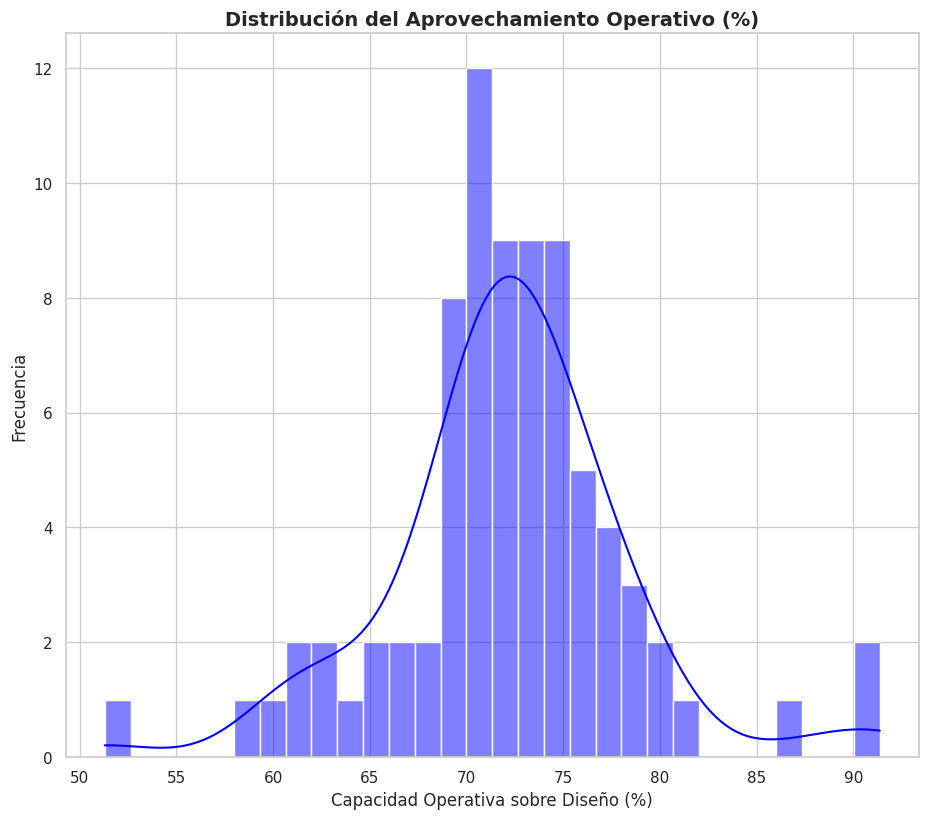

In [12]:
sns.histplot(
    (terminales_mexico_df['Capacidad_Operativa_barriles']/terminales_mexico_df['Capacidad_Diseño_barriles']) * 100,
    bins=30,
    color='blue',
    kde=True
)

plt.title('Distribución del Aprovechamiento Operativo (%)',
          fontsize=14, fontweight='bold')

plt.xlabel('Capacidad Operativa sobre Diseño (%)')
plt.ylabel('Frecuencia')

- La mayoría de las terminales operan entre el 60% y 85%, lo que podría significar que se puede optimizar su capacidad operativa. 

Capacidad Operativa por Región

/tmp/ipykernel_7319/1879253572.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Capacidad Operativa (barriles)')

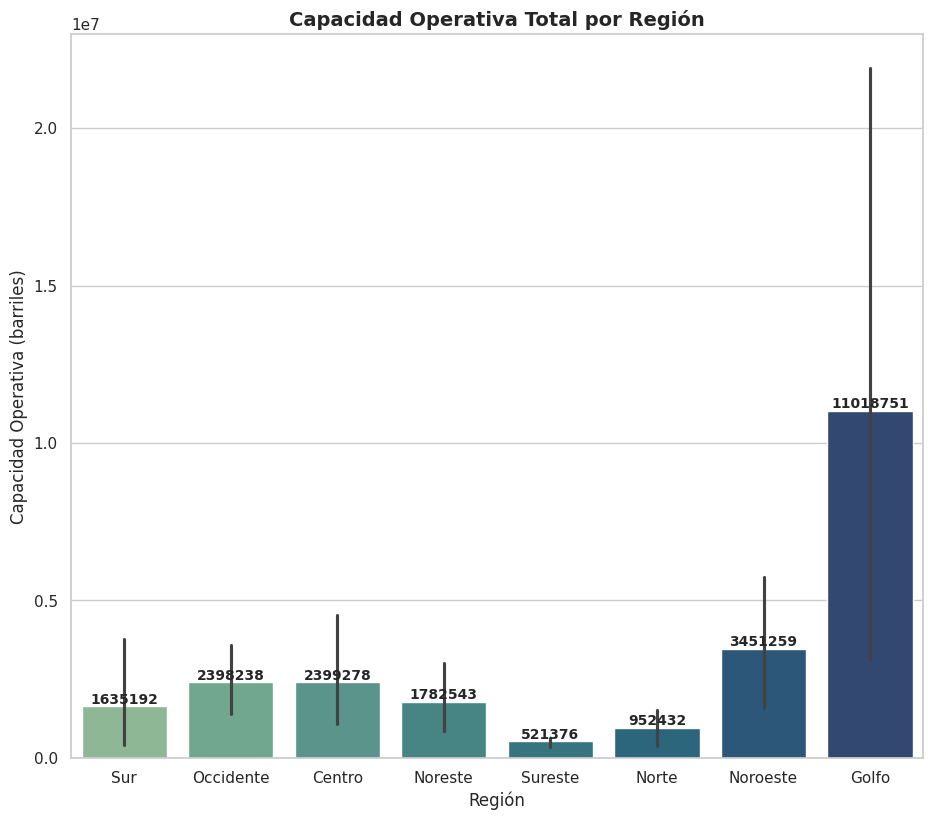

In [13]:
sns.barplot(
    data=terminales_mexico_df,
    x='Región',
    y='Capacidad_Operativa_barriles',
    estimator=sum,
    errorbar=('ci'),
    palette='crest'
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        int(p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Capacidad Operativa Total por Región',
          fontsize=14, fontweight='bold')

plt.xlabel('Región')
plt.ylabel('Capacidad Operativa (barriles)')

- La región que mejor desempeño operativo tienen es la del Golfo con 11,018,751 barriles.Esto se debe a las refinerías de Minatitlán y Dos Bocas, además de los yacimientos petroleros de esa misma región.
- Mientras que la de menor desempeño es la Sureste, con 521,376 barriles. Ya que no existen refinerías en esa región y muy pocos yacimientos petroleros.   

Capacidad Operativa por Producto a Almacenar

/tmp/ipykernel_7319/2530057507.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Gasolina;Diésel'),
  Text(1, 0, 'Gasolina;Diésel;Turbosina'),
  Text(2, 0, 'Gasolina;Diésel;Turbosina;Combustóleo'),
  Text(3, 0, 'Gasolina;Diésel;Combustóleo'),
  Text(4, 0, 'Petróleo'),
  Text(5, 0, 'Propano;Butano;Naftas')])

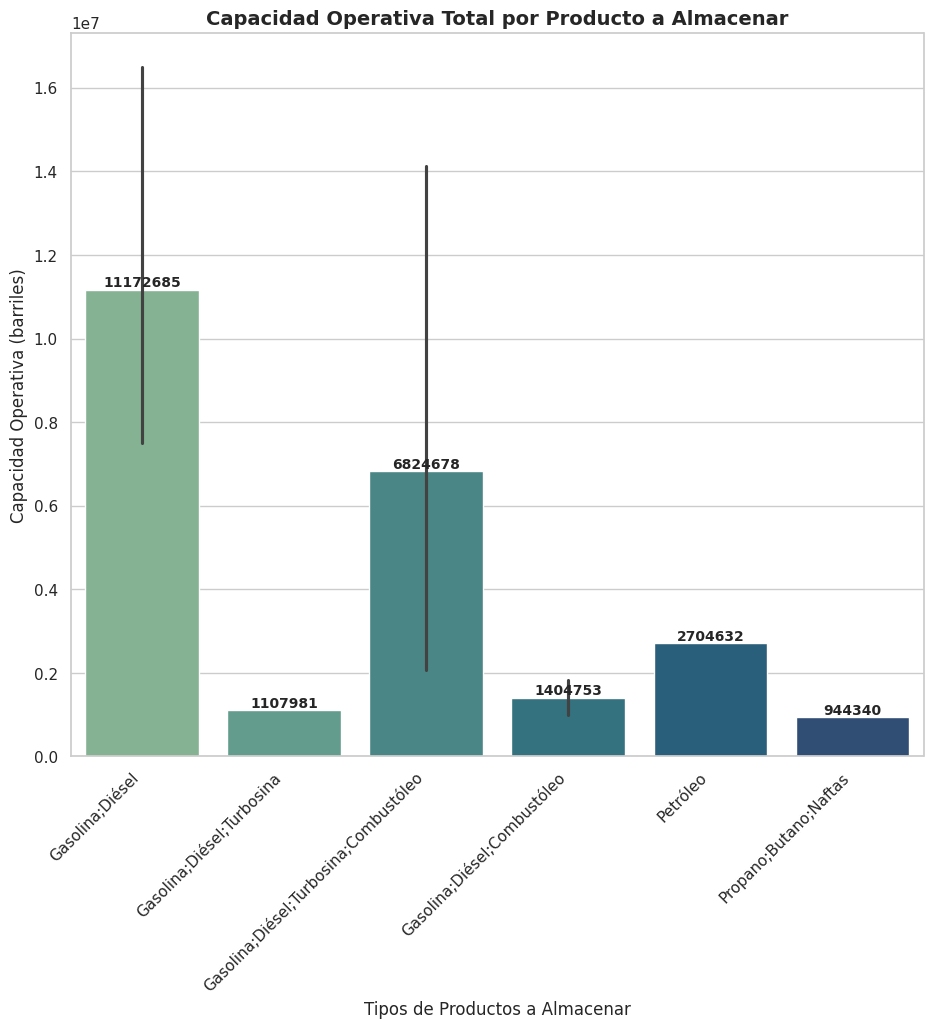

In [14]:
sns.barplot(
    data=terminales_mexico_df,
    x='Tipos_Productos_Almacenar',
    y='Capacidad_Operativa_barriles',
    estimator=sum,
    errorbar=('ci'),
    palette='crest',
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        int(p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Capacidad Operativa Total por Producto a Almacenar',
          fontsize=14, fontweight='bold')

plt.xlabel('Tipos de Productos a Almacenar')
plt.ylabel('Capacidad Operativa (barriles)')
plt.xticks(rotation=45, ha='right')

- Los productos que mayor Capacidad Operativa tienen son los de Gasolina y Diésel, con 11,172,685 barriles.
- Mientras que los de menor desempeño son los de Propano, Butano y Naftas, con 944,340 barriles.

Capacidad Operativa por Tipo de Terminal

/tmp/ipykernel_7319/264887754.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Capacidad Operativa (barriles)')

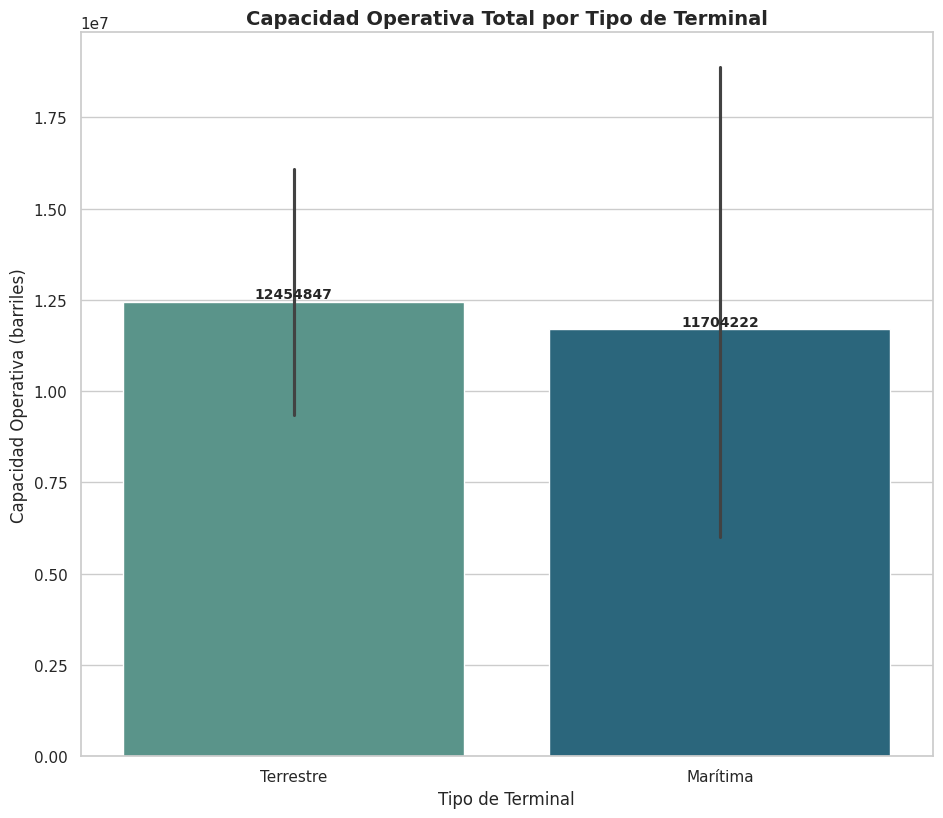

In [15]:
sns.barplot(
    data=terminales_mexico_df,
    x='Tipo_Terminal',
    y='Capacidad_Operativa_barriles',
    estimator=sum,
    errorbar=('ci'),
    palette='crest',
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        int(p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Capacidad Operativa Total por Tipo de Terminal',
          fontsize=14, fontweight='bold')

plt.xlabel('Tipo de Terminal')
plt.ylabel('Capacidad Operativa (barriles)')

- Si bien ambos tipos de Terminales tienen una capacidad operativa aceptable, la que tiene mayor desempeño es la Terrestre, con 12,454,847 barriles.

Correlación entre la Capacidad de Diseño y Operativa

Text(50.765625000000014, 0.5, 'Capacidad Operativa (barriles)')

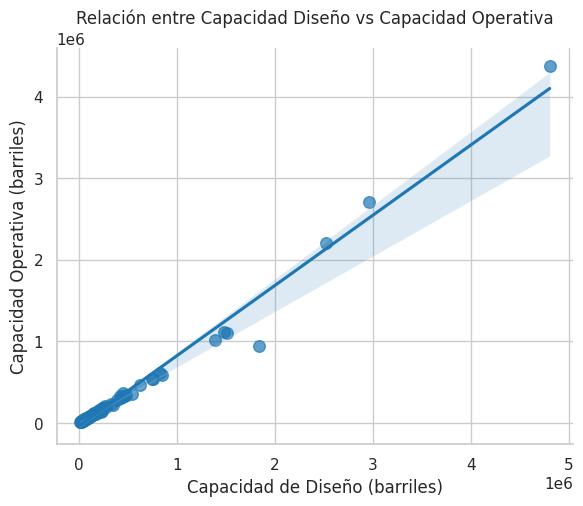

In [16]:
sns.lmplot(
    data=terminales_mexico_df,
    x='Capacidad_Diseño_barriles',
    y='Capacidad_Operativa_barriles',
    height=5,
    aspect=1.2,
    scatter_kws={'alpha': 0.7, 's': 70},
)

plt.title('Relación entre Capacidad Diseño vs Capacidad Operativa')

plt.xlabel('Capacidad de Diseño (barriles)')
plt.ylabel('Capacidad Operativa (barriles)')

In [11]:
terminales_mexico_df.corr(numeric_only=True)

,Año,Capacidad_Diseño_barriles,Capacidad_Operativa_barriles,Aprovechamiento (%)
Año,NaN,NaN,NaN,NaN
Capacidad_Diseño_barriles,NaN,1.00,0.99,0.43
Capacidad_Operativa_barriles,NaN,0.99,1.00,0.50
Aprovechamiento (%),NaN,0.43,0.50,1.00


- La correlación entre la Capacidad de Diseño y la Operativa tiene un valor de R = 0.99. Por lo que se puede decir que es fuertamente postiva, es decir que a mayor Capacidad de Diseño, igualmente mayor sera la Operativa y el Aprovechamiento. 

CONCLUSIONES

1. El promedio de la Capacidad Operativa es de 77.01%, lo que contesta la pregunta principal planteada y si bien se podría considerar aceptable, lo ideal es que se pueda optimizar para alcanzar un intervalo de 85% a 90%. 

2. Las regiones con mayor Capacidad de Diseño, son las que tienden a mejor desempeño y aprovechamiento operativo.

3. Hay una fuerte correlación positiva (R = 0.99) entre la Capacidad de Diseño y Operativa.

4. En el Notebook 03_eda_univariate_analysis_terminales.ipynb, para la capacidad de diseño se encontraron 9 valores atípicos. Donde 7 de ellos tienen una capacidad mayor a 1,000,000 barriles. Mientras que solo 2 son menores a esta última cifra. Por otro lado, para la capacidad operativa igualmente se encontraron 9 valores atípicos, 6 a una capacidad mayor de 1,000,000 barriles y 3 menores a esta cantidad.

5. En el Notebook 04_eda_univariate_analysis_tanques_terminales.ipynb, el tipo de tanque más común es 'Cilíndrico Vertical Atmosférico', con una proporción del 62.65%. Mientras que el subtipo de tanque más típico es 'Techo Fijo con Membrana Interna Flotante', con 29.82%.

IMPLICACIONES Y RECOMENDACIONES

- Los resultados con mejor aprovechamiento depende de su 'Capacidad de Diseño, Región e Infraestructura'
- Se recomienda integrar información adicional sobre la Capacidad Operativa de los Tanques, debido a que no se cuenta con información oficial de este dato.
- Con este información adicional del punto anterior, se podría aplicar un 'analisis de regresión múltiple' para evaluar si la capacidad diseño y operativa del tanque influyen en la eficiencia operativa. 

PRÓXIMOS PASOS

- Implementar un modelo de predicción básico en eficiencia.
- Incorporar un análisis temporal si se obtienen mayor cantidad de datos de tiempo.  